In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GlobalAveragePooling1D, Flatten
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


In [3]:

from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Copy of accurate_augmented_heart_data.csv')

Mounted at /content/drive


In [4]:
x = df.drop(columns=['target'])
y = df['target']

In [5]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)


In [6]:
x_scaled = x_scaled.reshape((x_scaled.shape[0], x_scaled.shape[1], 1))

In [7]:
x.shape[1]

11

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42, stratify=y)


In [9]:
# CNN Model
model = Sequential([
    Input(shape=(x_train.shape[1], 1)),

    Conv1D(filters=64, kernel_size=3, activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),

    Conv1D(filters=128, kernel_size=3, activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),

    Conv1D(filters=256, kernel_size=3, activation='relu', padding='same'),
    BatchNormalization(),
    GlobalAveragePooling1D(),
    Dropout(0.4),

    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Binary classification
])


In [10]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [11]:
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_heart_model.h5', save_best_only=True)


In [12]:
history = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_split=0.2,callbacks=[early_stop, checkpoint], verbose=1)

Epoch 1/100
220/224 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7427 - loss: 0.5350

224/224 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.7438 - loss: 0.5334 - val_accuracy: 0.7811 - val_loss: 0.5089
Epoch 2/100
221/224 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8296 - loss: 0.3871

224/224 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8296 - loss: 0.3870 - val_accuracy: 0.8470 - val_loss: 0.3618
Epoch 3/100
223/224 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8384 - loss: 0.3710

224/224 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.8384 - loss: 0.3710 - val_accuracy: 0.8554 - val_loss: 0.3427
Epoch 4/100
222/224 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8406 - loss: 0.3667

224/224 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.8406 - loss: 0.3667 - val_accuracy: 0.8638 - val_loss: 0.3360
Epoch 5/100
224/224 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8471 - loss: 0.3533

224/224 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.8471 - loss: 0.3533 - val_accuracy: 0.8632 - val_loss: 0.3346
Epoch 6/100
223/224 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8538 - loss: 0.3402

224/224 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8538 - loss: 0.3403 - val_accuracy: 0.8643 - val_loss: 0.3297
Epoch 7/100
221/224 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8497 - loss: 0.3392

224/224 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.8497 - loss: 0.3394 - val_accuracy: 0.8548 - val_loss: 0.3294
Epoch 8/100
224/224 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8506 - loss: 0.3458 - val_accuracy: 0.8537 - val_loss: 0.3333
Epoch 9/100
224/224 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8605 - loss: 0.3325 - val_accuracy: 0.8576 - val_loss: 0.3313
Epoch 10/100
224/224 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8514 - loss: 0.3385 - val_accuracy: 0.8649 - val_loss: 0.3308
Epoch 11/100
221/224 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8712 - loss: 0.3145

224/224 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.8710 - loss: 0.3148 - val_accuracy: 0.8632 - val_loss: 0.3274
Epoch 12/100
224/224 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.8587 - loss: 0.3386 - val_accuracy: 0.8593 - val_loss: 0.3322
Epoch 13/100
220/224 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8560 - loss: 0.3219

224/224 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8560 - loss: 0.3221 - val_accuracy: 0.8660 - val_loss: 0.3222
Epoch 14/100
224/224 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.8603 - loss: 0.3276 - val_accuracy: 0.8654 - val_loss: 0.3231
Epoch 15/100
224/224 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.8568 - loss: 0.3288 - val_accuracy: 0.8682 - val_loss: 0.3247
Epoch 16/100
221/224 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8654 - loss: 0.3136

224/224 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.8653 - loss: 0.3138 - val_accuracy: 0.8671 - val_loss: 0.3217
Epoch 17/100
219/224 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8605 - loss: 0.3141

224/224 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8606 - loss: 0.3143 - val_accuracy: 0.8660 - val_loss: 0.3207
Epoch 18/100
224/224 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.8563 - loss: 0.3191 - val_accuracy: 0.8582 - val_loss: 0.3264
Epoch 19/100
223/224 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8717 - loss: 0.3149

224/224 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.8717 - loss: 0.3149 - val_accuracy: 0.8638 - val_loss: 0.3201
Epoch 20/100
224/224 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.8655 - loss: 0.3182 - val_accuracy: 0.8666 - val_loss: 0.3254
Epoch 21/100
224/224 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.8709 - loss: 0.3171 - val_accuracy: 0.8654 - val_loss: 0.3222
Epoch 22/100
224/224 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.8755 - loss: 0.3097 - val_accuracy: 0.8649 - val_loss: 0.3211
Epoch 23/100
224/224 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8723 - loss: 0.3110 - val_accuracy: 0.8660 - val_loss: 0.3215
Epoch 24/100
223/224 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8649 - loss: 0.3086

224/224 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8649 - loss: 0.3087 - val_accuracy: 0.8626 - val_loss: 0.3199
Epoch 25/100
224/224 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8712 - loss: 0.3078 - val_accuracy: 0.8604 - val_loss: 0.3232
Epoch 26/100
224/224 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.8723 - loss: 0.2994 - val_accuracy: 0.8587 - val_loss: 0.3246
Epoch 27/100
224/224 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.8687 - loss: 0.3056 - val_accuracy: 0.8654 - val_loss: 0.3206
Epoch 28/100
219/224 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8710 - loss: 0.3059

224/224 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8710 - loss: 0.3059 - val_accuracy: 0.8626 - val_loss: 0.3199
Epoch 29/100
224/224 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8787 - loss: 0.2888 - val_accuracy: 0.8621 - val_loss: 0.3306
Epoch 30/100
224/224 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.8747 - loss: 0.2976 - val_accuracy: 0.8666 - val_loss: 0.3282
Epoch 31/100
224/224 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8748 - loss: 0.2967 - val_accuracy: 0.8615 - val_loss: 0.3236
Epoch 32/100
224/224 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8789 - loss: 0.2929 - val_accuracy: 0.8604 - val_loss: 0.3224
Epoch 33/100
224/224 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8725 - loss: 0.3051 - val_accuracy: 0.8604 - val_loss: 0.3221
Epoch 34/100
224/224 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8805 - loss: 0.2951 - val_accuracy: 0.8599 - val_loss: 0.3257
Epoch 35/100
222/224 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8805 - loss: 0.2854

224/224 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.8804 - loss: 0.2856 - val_accuracy: 0.8688 - val_loss: 0.3149
Epoch 36/100
224/224 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8864 - loss: 0.2781 - val_accuracy: 0.8632 - val_loss: 0.3241
Epoch 37/100
224/224 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8796 - loss: 0.2893 - val_accuracy: 0.8710 - val_loss: 0.3165
Epoch 38/100
224/224 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8719 - loss: 0.3075 - val_accuracy: 0.8604 - val_loss: 0.3287
Epoch 39/100
224/224 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.8670 - loss: 0.2998 - val_accuracy: 0.8587 - val_loss: 0.3261
Epoch 40/100
222/224 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8790 - loss: 0.2870

224/224 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.8790 - loss: 0.2870 - val_accuracy: 0.8710 - val_loss: 0.3087
Epoch 41/100
224/224 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8766 - loss: 0.2882 - val_accuracy: 0.8688 - val_loss: 0.3217
Epoch 42/100
224/224 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8804 - loss: 0.2787 - val_accuracy: 0.8666 - val_loss: 0.3194
Epoch 43/100
224/224 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8826 - loss: 0.2786 - val_accuracy: 0.8666 - val_loss: 0.3209
Epoch 44/100
224/224 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.8833 - loss: 0.2744 - val_accuracy: 0.8682 - val_loss: 0.3195
Epoch 45/100
224/224 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.8777 - loss: 0.2846 - val_accuracy: 0.8660 - val_loss: 0.3283
Epoch 46/100
224/224 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8841 - loss: 0.2782 - val_accuracy: 0.8699 - val_loss: 0.3323
Epoch 47/100
224/224 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8843 - loss: 0.2798 - val_a

In [13]:
y_pred = model.predict(x_test)
y_pred_labels = (y_pred > 0.5).astype(int)

print("Accuracy:", accuracy_score(y_test, y_pred_labels))
print(classification_report(y_test, y_pred_labels))

70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Accuracy: 0.8726541554959786
              precision    recall  f1-score   support

           0       0.87      0.86      0.86      1056
           1       0.87      0.89      0.88      1182

    accuracy                           0.87      2238
   macro avg       0.87      0.87      0.87      2238
weighted avg       0.87      0.87      0.87      2238



In [18]:
# Extract values from history
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history.get('accuracy', history.history.get('acc'))  # Some versions use 'acc'
val_accuracy = history.history.get('val_accuracy', history.history.get('val_acc'))

epochs = range(1, len(loss) + 1)


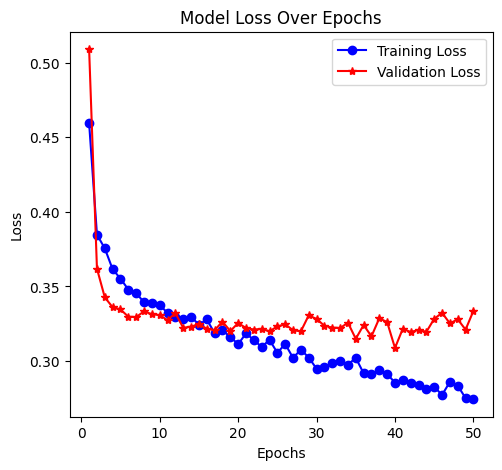

In [19]:
# Plot Loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'r*-', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss Over Epochs')
plt.legend()

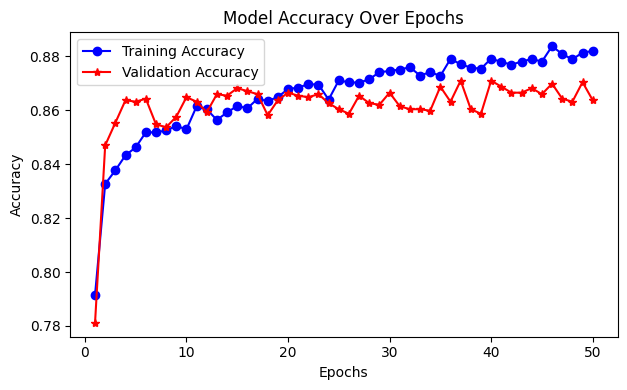

In [20]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 2)
plt.plot(epochs, accuracy, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r*-', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.legend()

plt.tight_layout()
plt.show()

In [17]:
import tensorflow as tf
import os
import time
from tensorflow.python.framework.convert_to_constants import convert_variables_to_constants_v2
from tensorflow.python.profiler import model_analyzer
from tensorflow.python.profiler.option_builder import ProfileOptionBuilder

def evaluate_model_metrics(model, x_test, y_test, model_name="model_metrics"):
    results = {}

    # Total Parameters
    results['total_parameters'] = model.count_params()

    # FLOPs Calculation
    func = tf.function(lambda x: model(x))
    concrete_func = func.get_concrete_function(
        tf.TensorSpec([1] + list(model.input_shape[1:]), model.inputs[0].dtype)
    )
    frozen_func = convert_variables_to_constants_v2(concrete_func)
    flops = model_analyzer.profile(
        graph=frozen_func.graph,
        options=ProfileOptionBuilder.float_operation()
    ).total_float_ops
    results['FLOPs'] = flops
    results['GFLOPs'] = flops / 1e9

    # Model Size
    model_path = f"{model_name}.h5"
    model.save(model_path)
    size_bytes = os.path.getsize(model_path)
    results['model_size_bytes'] = size_bytes
    results['model_size_MB'] = size_bytes / (1024 * 1024)

    # Inference Time
    start = time.time()
    model.predict(x_test)
    end = time.time()
    results['inference_time_seconds'] = end - start

    # Accuracy
    loss, acc = model.evaluate(x_test, y_test, verbose=0)
    results['accuracy'] = acc

    return results
evaluate_model_metrics(model, x_test, y_test, model_name="model_metrics")

Instructions for updating:
This API was designed for TensorFlow v1. See https://www.tensorflow.org/guide/migrate for instructions on how to migrate your code to TensorFlow v2.


70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


{'total_parameters': 158337,
 'FLOPs': 719041,
 'GFLOPs': 0.000719041,
 'model_size_bytes': 1968520,
 'model_size_MB': 1.8773269653320312,
 'inference_time_seconds': 0.2912755012512207,
 'accuracy': 0.872654139995575}